In [56]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

**Import necessary libraries and apply one hot-coding n our dataset**

In [57]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


Let’s select itemsets with a minimum of 60% support

In [58]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


**Let's apply this algorithm on the market basket**

In [59]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
df = pd.read_csv('C:\\Users\\Pc\\Desktop\\GoMyCode\\Market_Basket_Optimisation.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Data cleaning**

In [61]:
# replacing empty value with 0.
df.fillna(0,inplace=True)

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


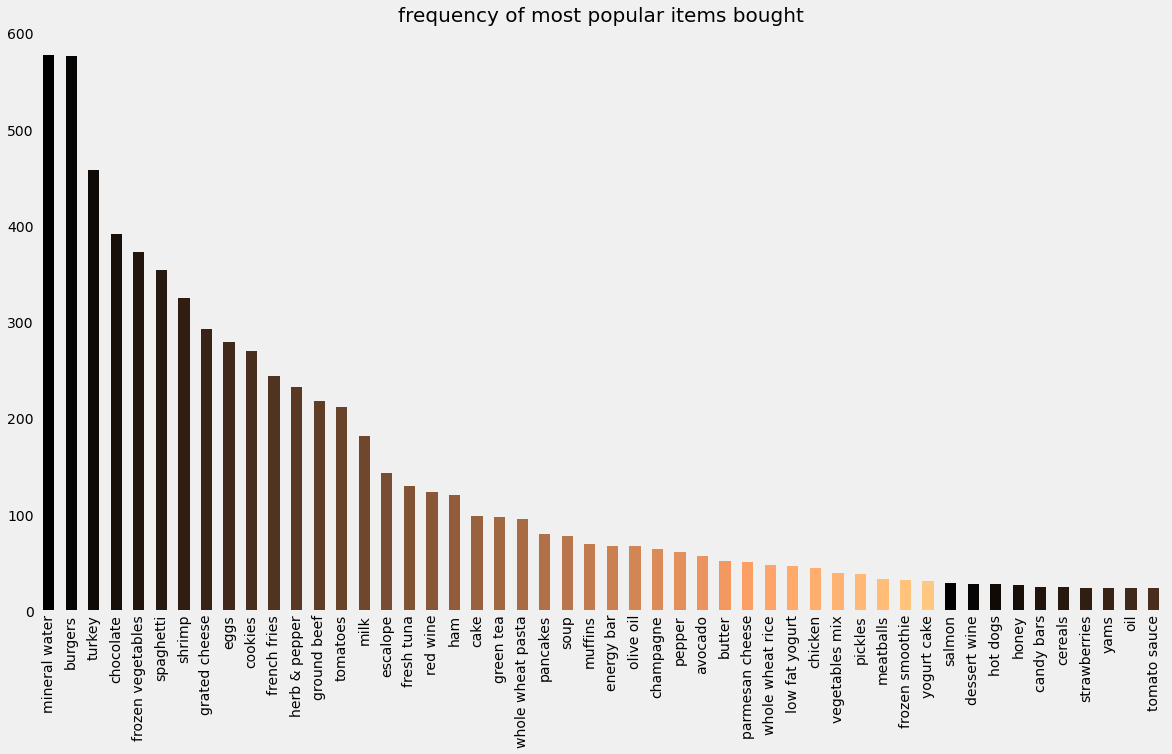

In [63]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(50).plot.bar(color = color)
plt.title('frequency of most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [64]:
y = df[0].value_counts().head(50).to_frame()
y.index
y.head()

,0
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373


(0.0, 100.0, 0.0, 100.0)

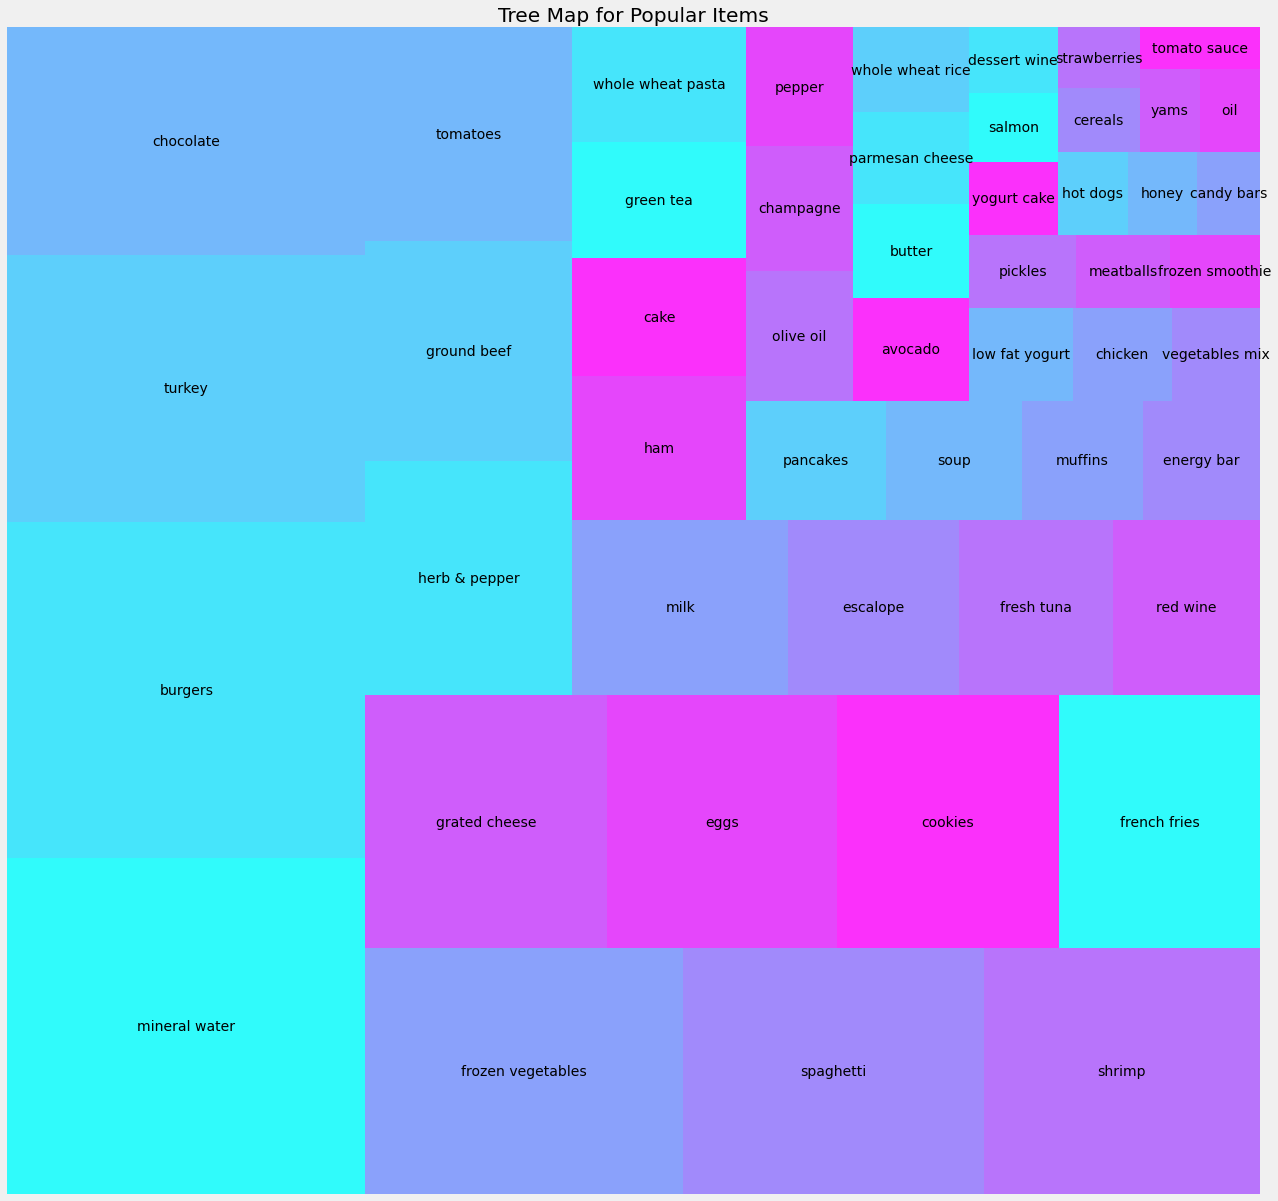

In [65]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1,10))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')

In [66]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,food
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,Food
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food
2,chutney,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food
3,turkey,avocado,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food


**Data preprocessing**

In [67]:
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [68]:
print(trans)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... '0' '0' '0']
 ['chutney' '0' '0' ... '0' '0' '0']
 ...
 ['chicken' '0' '0' ... '0' '0' '0']
 ['escalope' 'green tea' '0' ... '0' '0' '0']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... '0' '0' '0']]


In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
df = te.fit_transform(trans)
df = pd.DataFrame(df, columns = te.columns_)

# getting the shape of the data
df.shape

(7501, 121)

In [46]:
df.head()

,asparagus,0,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,True,True,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [47]:
df.columns

Index([' asparagus', '0', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [51]:
df.columns.values

array([' asparagus', '0', 'almonds', 'antioxydant juice', 'asparagus',
       'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea',
       'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray',
       'burger sauce', 'burgers', 'butter', 'cake', 'candy bars',
       'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken',
       'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider',
       'clothes accessories', 'cookies', 'cooking oil', 'corn',
       'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs',
       'energy bar', 'energy drink', 'escalope', 'extra dark chocolate',
       'flax seed', 'french fries', 'french wine', 'fresh bread',
       'fresh tuna', 'fromage blanc', 'frozen smoothie',
       'frozen vegetables', 'gluten free bar', 'grated cheese',
       'green beans', 'green grapes', 'green tea', 'ground beef', 'gums',
       'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs',
       'ketchup', 'light cream', 'light ma

**apriori algorithm**

In [52]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(df, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.999867,(0)
1,0.020397,(almonds)
2,0.033329,(avocado)
3,0.010799,(barbecue sauce)
4,0.014265,(black tea)
...,...,...
510,0.011065,"(0, mineral water, ground beef, milk)"
511,0.017064,"(0, spaghetti, ground beef, mineral water)"
512,0.015731,"(0, spaghetti, milk, mineral water)"
513,0.010265,"(0, mineral water, olive oil, spaghetti)"


**Selecting and filtring the results**

In [53]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.999867,(0),1
1,0.087188,(burgers),1
2,0.081056,(cake),1
3,0.059992,(chicken),1
4,0.163845,(chocolate),1
5,0.080389,(cookies),1
6,0.051060,(cooking oil),1
7,0.179709,(eggs),1
8,0.079323,(escalope),1
9,0.170911,(french fries),1


In [54]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
26,0.087188,"(0, burgers)",2
27,0.081056,"(0, cake)",2
28,0.059992,"(chicken, 0)",2
29,0.163845,"(0, chocolate)",2
30,0.080389,"(0, cookies)",2
31,0.051060,"(0, cooking oil)",2
32,0.179709,"(0, eggs)",2
33,0.079323,"(0, escalope)",2
34,0.170911,"(0, french fries)",2
35,0.063192,"(0, frozen smoothie)",2


In [55]:
# getting th item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.999867,(0),1
1,0.087188,(burgers),1
2,0.081056,(cake),1
3,0.059992,(chicken),1
4,0.163845,(chocolate),1
5,0.080389,(cookies),1
6,0.051060,(cooking oil),1
7,0.179709,(eggs),1
8,0.079323,(escalope),1
9,0.170911,(french fries),1
